In [3]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns



#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [99]:
# display the columns related to citizenship data 
start_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Citizenship Country', 'Citizenship Region', 'Citizenship Intermediate Region', 'Citizenship Sub-Region']])
start_df.head(2)

,gender,ageBroad,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
0,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
1,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean


In [100]:
#check to see if there is any missing info in the columns
start_df.count()

gender                             48773
ageBroad                           48773
Citizenship Country                48773
Citizenship Region                 48773
Citizenship Intermediate Region    11001
Citizenship Sub-Region             48773
dtype: int64

In [101]:
# create a new data frame that doesn't include the 'Citizenship Intermediate Region' bc it has missing info & isn't of importance to me rn
citizen_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Citizenship Region', 'Citizenship Sub-Region', 'Citizenship Country',]])
citizen_df.count()

gender                    48773
ageBroad                  48773
Citizenship Region        48773
Citizenship Sub-Region    48773
Citizenship Country       48773
dtype: int64

In [102]:
citizen_df_renamed = citizen_df.rename(columns = {'gender' : 'Gender', 'ageBroad' : 'Age Range',})
citizen_df_renamed.head(2)

,Gender,Age Range,Citizenship Region,Citizenship Sub-Region,Citizenship Country
0,Female,18--20,Americas,Latin America and the Caribbean,Colombia
1,Female,18--20,Americas,Latin America and the Caribbean,Colombia


In [103]:
citizen_df_renamed['Citizenship Country'].nunique()

45

In [104]:
citizen_df_renamed['Citizenship Country'].value_counts()

Philippines                         11365
unknown                              9136
Ukraine                              7761
Republic of Moldova                  5901
United States of America             3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People's Democratic Republic      126
Colombia                              124
Nigeria                               108
Afghanistan                            97
Madagascar                             94
Sri Lanka                              85
Sierra Leone                      

In [105]:
regions = clean_data['Citizenship Region'].value_counts()
regions

Asia        17992
Europe      16144
unknown      9136
Americas     4136
Africa       1365
Name: Citizenship Region, dtype: int64

In [138]:
# # In the example code I'm using "I create a series and run on that, 
# # so for consistency I create a series from the list."

# region_bar = [17992, 16144, 4136, 1365]
# x_labels = ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA',]

# plt.figure()
# ax = region_bar.plot(kind='bar')
# ax.title("Victim's Region of Citizenship")
# ax.ylabel('Number of Cases Reported')
# ax.xlabel('Region')
# ax.set_xticklabels(x_labels)

# bars = ax.patches

# # Make some labels.
# labels = ["label%d" % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')




In [ ]:
set_palette(seaborn_colorblind)
sns.color_palette("flare", as_cmap=True)

<IPython.core.display.Javascript object>


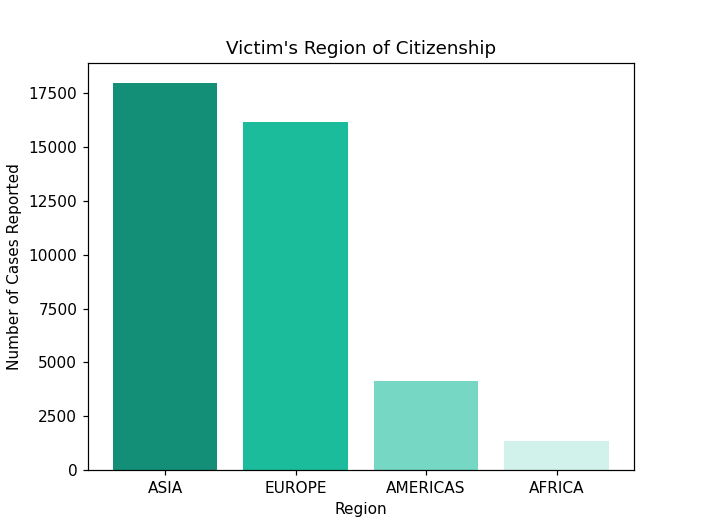

In [5]:
#create a bar chart of cases per region

region_bar = [17992, 16144, 4136, 1365]
x_axis = np.arange(len(region_bar))

tick_locations = ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA']
tick_locations = [value for value in x_axis]
colors = ['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB']

plt.title("Victim's Region of Citizenship")
plt.ylabel('Number of Cases Reported')
plt.xlabel('Region')

plt.bar(x_axis, region_bar, color=colors, align='center')
plt.xticks(tick_locations, ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA']);

plt.savefig("Images/citizen_region_bar.png")

In [108]:
#create a pie chart of cases per region

# labels = 'ASIA', 'EUROPE', 'AMERICAS', 'AFRICA',
# sizes = [45.40, 40.73, 10.43, 3.44]
# colors = ['darkolivegreen', 'olive', 'darkgoldenrod', 'goldenrod']
# explode = (0.1, 0, 0, 0)

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=45);

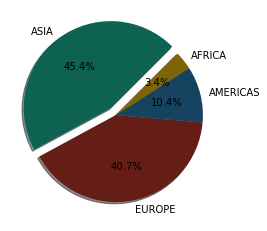

In [109]:
#citizenship region

labels = 'ASIA', 'EUROPE', 'AMERICAS', 'AFRICA',
sizes = [17992, 16144, 4136, 1365]
#colors = ['darkolivegreen', 'olive', 'darkgoldenrod', 'goldenrod']
colors= ['#0E6251', '#641E16', '#154360', '#7D6608']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45);

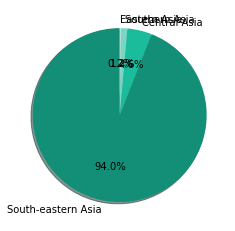

In [133]:
labels= 'South-eastern Asia', 'Central Asia', 'Southern Asia', 'Eastern Asia'
#'Eastern Europe', 'Southern Europe', 'Northern America', 'Latin America and the Caribbean', 'Sub-Saharan Africa'

sizes= [16916, 821, 220, 35,]
#16122, 22, 3636, 500, 1365

colors= ['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB']
#'#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A'
#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90);

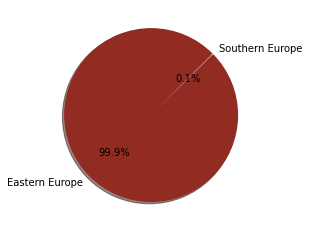

In [131]:
labels= 'Eastern Europe', 'Southern Europe'
#'South-eastern Asia', 'Central Asia', 'Southern Asia', 'Eastern Asia'
#, 'Northern America', 'Latin America and the Caribbean', 'Sub-Saharan Africa'

sizes= [16122, 22]
#[16916, 821, 220, 35, 16122, 22, 3636, 500, 1365]
colors= ['#922B21', '#E6B0AA']
#['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB'#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A']

#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45);

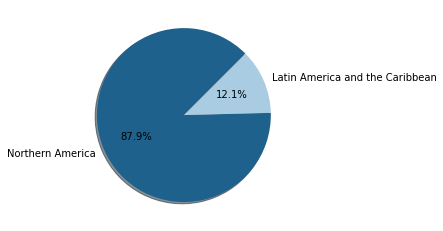

In [132]:
labels= 'Northern America', 'Latin America and the Caribbean'
#'South-eastern Asia', 'Central Asia', 'Southern Asia', 'Eastern Asia'
#, 'Northern America', 'Latin America and the Caribbean', 'Sub-Saharan Africa'

sizes= [3636, 500]
#[16916, 821, 220, 35, 16122, 22, 3636, 500, 1365]
colors= ['#1F618D', '#A9CCE3']
#['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB'#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#922B21', '#E6B0AA' '#9A7D0A']

#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45);

<Figure size 504x504 with 0 Axes>

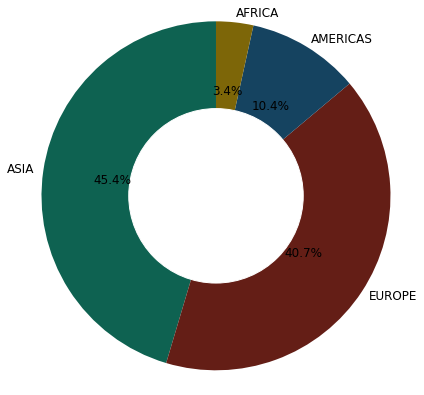

In [111]:

plt.figure(figsize=(7, 7))

labels = 'ASIA', 'EUROPE', 'AMERICAS', 'AFRICA'

sizes = [17992, 16144, 4136, 1365]

colors= ['#0E6251', '#641E16', '#154360', '#7D6608']

plt.figure(figsize=(7, 7))

my_circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie
d = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)

for i, (ASIA, EUROPE, AMERICAS, AFRICA) in enumerate(d):
    if i > 0:
        ASIA.set_fontsize(12)
        EUROPE.set_fontsize(12)
        AMERICAS.set_fontsize(12)
        AFRICA.set_fontsize(12)
                
plt.show()

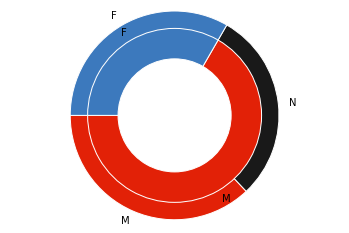

In [76]:
import matplotlib.pyplot as plt
import numpy as np

def make_pie(sizes, text,colors,labels, radius=1):
    col = [[i/255 for i in c] for c in colors]

    plt.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180)
    outside, _ = plt.pie(sizes, radius=radius, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    plt.text(0, 0, text, ha='center', **kwargs)

# Group colors
c1 = (226, 33, 7)
c2 = (60, 121, 189)

# Subgroup colors
d1 = (226, 33, 7)
d2 = (60, 121, 189)
d3 = (25, 25, 25)

make_pie([100, 80, 90], "", [d1, d3, d2], ['M', 'N', 'F'], radius=1.2)
make_pie([180, 90], "", [c1, c2], ['M', 'F'], radius=1)
plt.show()

In [83]:
labels = ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA']

sizes = [17992, 16144, 4136, 1365]

colors = ['#0E6251', '#641E16', '#154360', '#7D6608']

sub_labels= ['South-eastern Asia','Central Asia', 'Southern Asia', 'Eastern Asia', 'Eastern Europe', 'Southern Europe', 'Northern America', 'Latin America and the Caribbean', 'Sub-Saharan Africa']

sub_sizes= [16916, 821, 220, 35, 16122, 22, 3636, 500, 1365]

sub_colors= ['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB', '#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A']

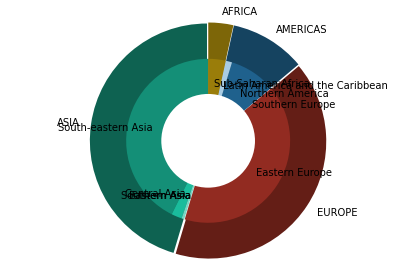

In [124]:
# plt.figure(figsize=(8, 8))

# labels = labels
# sizes = sizes
# sub_labels = sub_labels
# sub_sizes = sub_sizes
# colors_big = ['#0E6251', '#641E16', '#154360', '#7D6608']
# colors_small = ['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB', '#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A']
 

#********************
labels = ['ASIA', 'EUROPE', 'AMERICAS', 'AFRICA']
sizes = [17992, 16144, 4136, 1365]
colors = ['#0E6251', '#641E16', '#154360', '#7D6608'] 

sub_labels= ['South-eastern Asia','Central Asia', 'Southern Asia', 'Eastern Asia', 'Eastern Europe', 
             'Southern Europe', 'Northern America', 'Latin America and the Caribbean', 'Sub-Saharan Africa']
sub_sizes= [16916, 821, 220, 35, 16122, 22, 3636, 500, 1365]
sub_colors= ['#148F77', '#1ABC9C', '#76D7C4', '#D1F2EB', '#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A']

bigger = plt.pie(sizes, explode=(0.01, 0.01, 0.01, 0.01), labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sub_sizes, explode=(0, 0, 0, 0, 0, 0, 0,0 ,0), labels=sub_labels,
                  colors=sub_colors, radius=0.7,
                  startangle=90, labeldistance=0.7)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.set_title("Citizenship Region")
plt.show()     


In [41]:
#plt.bar(x_axis, region_bar, color = 'c', align = 'center')

In [58]:
sub_regions = clean_data['Citizenship Sub-Region'].value_counts()
list(sub_regions)

[16916, 16122, 9136, 3636, 1365, 821, 500, 220, 35, 22]

#### ASIA - data exploration - region and gender

In [43]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_asia = citizen_df_renamed['Citizenship Region'] == 'Asia'

female_asia = pd.DataFrame(citizen_df_renamed[is_female & is_asia])
male_asia = pd.DataFrame(citizen_df_renamed[is_male & is_asia])

female_asia.nunique()

Gender                     1
Age Range                 10
Citizenship Region         1
Citizenship Sub-Region     4
Citizenship Country       15
dtype: int64

In [44]:
male_asia.nunique()

Gender                     1
Age Range                 10
Citizenship Region         1
Citizenship Sub-Region     3
Citizenship Country       10
dtype: int64

In [45]:
asia_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Asia', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
asia_df.head(2)

,Gender,Age Range,Citizenship Sub-Region,Citizenship Country
1977,Female,18--20,Central Asia,Uzbekistan
1978,Female,18--20,Central Asia,Uzbekistan


In [46]:
# copy the df so we don't overwrite original asia_df data
asia_df_copy = asia_df.copy()

<IPython.core.display.Javascript object>


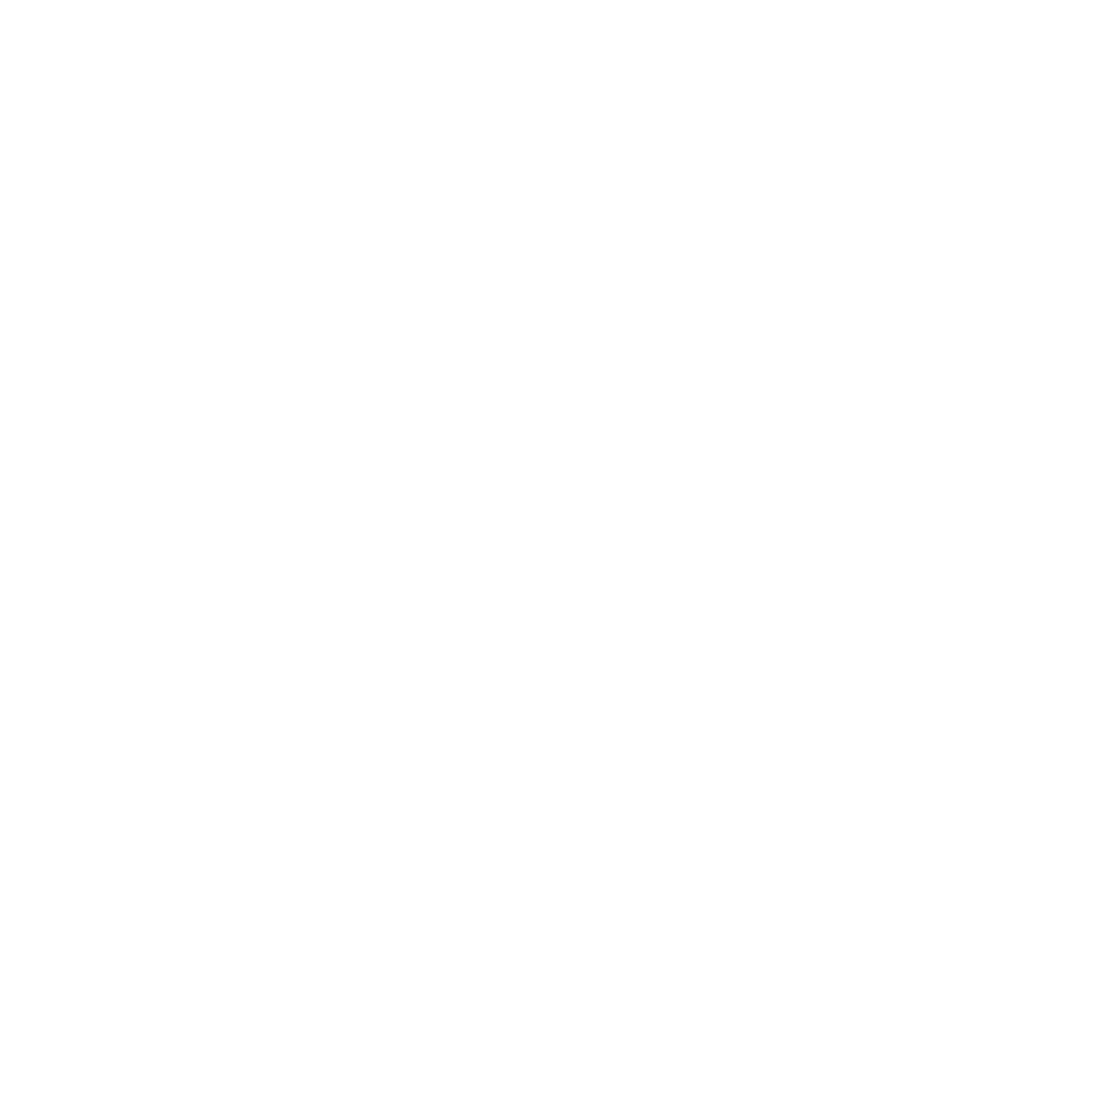

<IPython.core.display.Javascript object>


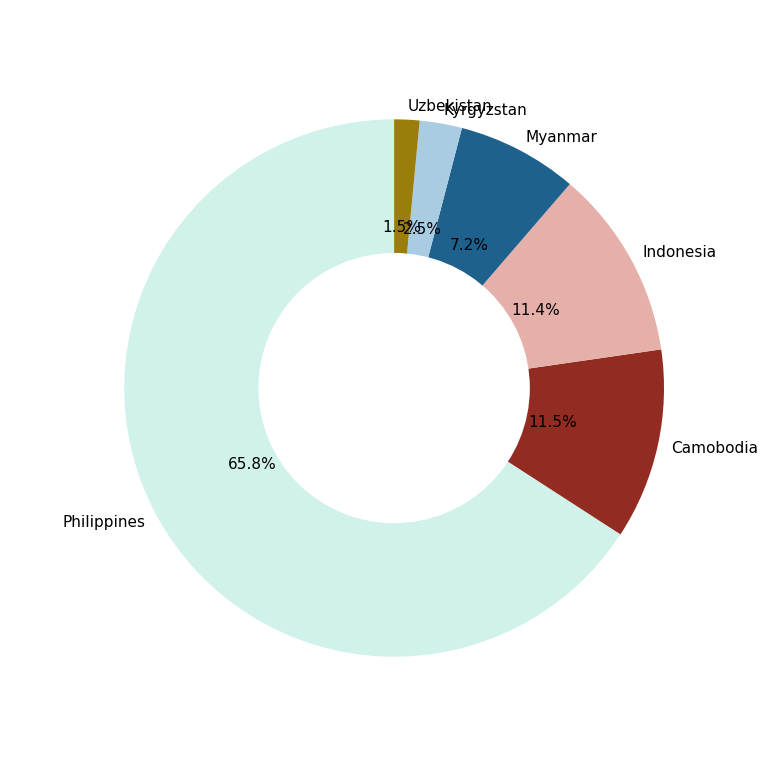

In [152]:
#asia_df_copy.head()
#Top 5 countries in Asia
plt.figure(figsize=(10, 10))

labels = 'Philippines', 'Camobodia', 'Indonesia', 'Myanmar', 'Kyrgyzstan', 'Uzbekistan'

sizes = [11365, 1979, 1971, 1250, 437, 261]

colors= ['#D1F2EB', '#922B21', '#E6B0AA', '#1F618D', '#A9CCE3', '#9A7D0A'] 

plt.figure(figsize=(7, 7))

my_circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie
d = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)

# for i, (ASIA, EUROPE, AMERICAS, AFRICA) in enumerate(d):
#     if i > 0:
#         ASIA.set_fontsize(12)
#         EUROPE.set_fontsize(12)
#         AMERICAS.set_fontsize(12)
#         AFRICA.set_fontsize(12)
                
plt.show();


In [153]:
country_counts = asia_df_copy['Citizenship Country'].value_counts()


In [49]:
country_list = asia_df_copy['Citizenship Country'].unique()
country_list

array(['Uzbekistan', 'Indonesia', 'Tajikistan', 'Kyrgyzstan', 'Cambodia',
       "Lao People's Democratic Republic", 'Kazakhstan', 'Turkmenistan',
       'Sri Lanka', 'Myanmar', 'Afghanistan', 'Nepal', 'Philippines',
       'Bangladesh', 'Thailand', 'Republic of Korea', 'Viet Nam', 'China'],
      dtype=object)

In [50]:
#asia_countries = ['Uzbekistan', 'Indonesia', 'Tajikistan', 'Kyrgyzstan', 'Cambodia',
       #"Lao People's Democratic Republic", 'Kazakhstan', 'Turkmenistan',
       #'Sri Lanka', 'Myanmar', 'Afghanistan', 'Nepal', 'Philippines',
       #'Bangladesh', 'Thailand', 'Republic of Korea', 'Viet Nam', 'China']

#x_axis = asia_countries

#y_axis = np.arange(1, 12000, 100)
#plt.bar(x_axis, y_axis, color = 'm')

In [51]:
asia_gender_counts = asia_df_copy['Gender'].value_counts()
asia_gender_counts

Female    11725
Male       6267
Name: Gender, dtype: int64

In [141]:
asia_sub_counts = asia_df_copy['Citizenship Sub-Region'].value_counts()
asia_sub_counts

South-eastern Asia    16916
Central Asia            821
Southern Asia           220
Eastern Asia             35
Name: Citizenship Sub-Region, dtype: int64

In [145]:
# use groupby to separate the data into fields acoording to country
grouped_asia_gender_df = asia_df_copy.groupby(['Citizenship Sub-Region', 'Gender'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_asia_gender_df)

#in order to be visualized, a data function must be used
grouped_asia_gender_df.count()

Age Range  Citizenship Country
Citizenship Sub-Region Gender                                
Central Asia           Female        340                  340
                       Male          481                  481
Eastern Asia           Female         35                   35
South-eastern Asia     Female      11238                11238
                       Male         5678                 5678
Southern Asia          Female        112                  112
                       Male          108                  108

In [53]:
# use groupby to separate the data into fields acoording to country
grouped_asia_df = asia_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_asia_df)

#in order to be visualized, a data function must be used
grouped_asia_df.count().head()

Citizenship Sub-Region
Citizenship Country Gender Age Range                        
Afghanistan         Male   9--17                          97
Bangladesh          Male   30--38                         11
Cambodia            Female 0--8                           30
                           18--20                         60
                           21--23                         53

In [54]:
asia_sub_list = asia_df_copy['Citizenship Sub-Region'].unique()
list(asia_sub_list)

['Central Asia', 'South-eastern Asia', 'Southern Asia', 'Eastern Asia']

#### EUROPE - data exploration  - region and gender

In [55]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_europe = citizen_df_renamed['Citizenship Region'] == 'Europe'
female_europe = pd.DataFrame(citizen_df_renamed[is_female & is_europe])
male_europe = pd.DataFrame(citizen_df_renamed[is_male & is_europe])

#show unique values in the series
female_europe.nunique() 

Gender                    1
Age Range                 9
Citizenship Region        1
Citizenship Sub-Region    2
Citizenship Country       6
dtype: int64

In [56]:
male_europe.nunique()

Gender                    1
Age Range                 9
Citizenship Region        1
Citizenship Sub-Region    1
Citizenship Country       4
dtype: int64

In [57]:
europe_df_copy = europe_df.copy()

NameError: name 'europe_df' is not defined

In [ ]:
europe_sub_counts = europe_df_copy['Citizenship Sub-Region'].value_counts()
europe_sub_counts

In [ ]:
europe_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Europe', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
europe_df.head()

In [ ]:
# use groupby to separate the data into fields acoording to country
europe_df_copy = europe_df.copy()
grouped_europe_df = europe_df_copy.groupby(['Citizenship Country', 'Gender', 'Age Range'])

#the object returned is a groupby object and cannot be returned normally
print(grouped_europe_df)

#in order to be visualized, a data function must be used
grouped_europe_df.count().head()

#### AMERICAS - data exploration  - region and gender

In [ ]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_americas = citizen_df_renamed['Citizenship Region'] == 'Americas'

female_americas = pd.DataFrame(citizen_df_renamed[is_female & is_americas])
male_americas = pd.DataFrame(citizen_df_renamed[is_male & is_americas])

female_americas.nunique()

In [ ]:
male_americas.nunique()

In [ ]:
americas_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Americas', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
americas_df

#### AFRICA - data exploration  - region and gender

In [ ]:
#create a data frame for each region, based on gender
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_africa = citizen_df_renamed['Citizenship Region'] == 'Africa'

female_africa = pd.DataFrame(citizen_df_renamed[is_female & is_africa])
male_africa = pd.DataFrame(citizen_df_renamed[is_male & is_africa])

female_africa.nunique()

In [ ]:
male_africa.nunique()

In [ ]:
africa_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'Africa', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
africa_df

#### UNKNOWN - data exploration  - region and gender

In [ ]:
#create a data frame for each region, based on gender 
is_female = citizen_df_renamed['Gender'] == 'Female'
is_male = citizen_df_renamed['Gender'] == 'Male'
is_unknown = citizen_df_renamed['Citizenship Region'] == 'unknown'

female_unknown = pd.DataFrame(citizen_df_renamed[is_female & is_unknown])
male_unknown = pd.DataFrame(citizen_df_renamed[is_male & is_unknown])

female_unknown.nunique()

In [ ]:
male_unknown.nunique()

In [ ]:
unknown_df = citizen_df_renamed.loc[citizen_df_renamed['Citizenship Region'] == 'unknown', ['Gender', 'Age Range', 'Citizenship Sub-Region', 'Citizenship Country']]
unknown_df

In [ ]:
unknown_df.nunique()  

In [ ]:
pycountry.countries.lookup('CO')